# SkillCraft Technology Data Science Internship

## Task 3

####  Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. use a dataset such as the taitanic dataset from the UCI machine Learning Respository.

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Dataset
df = sns.load_dataset('titanic')
print("Data Loaded")
print(df.head())

Data Loaded
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# Data Preprocessing
# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing embark_town with the most common value
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [7]:
# Convert categorical columns to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embark_town'], drop_first=True)

In [9]:
# Features & Target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
        'embark_town_Queenstown', 'embark_town_Southampton']]
y = df['survived']

In [11]:
# Drop rows with missing target
X = X.dropna()
y = y.loc[X.index]

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Build Model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [17]:
# Predictions
y_pred = clf.predict(X_test)

In [19]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458

Confusion Matrix:
 [[96  9]
 [27 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



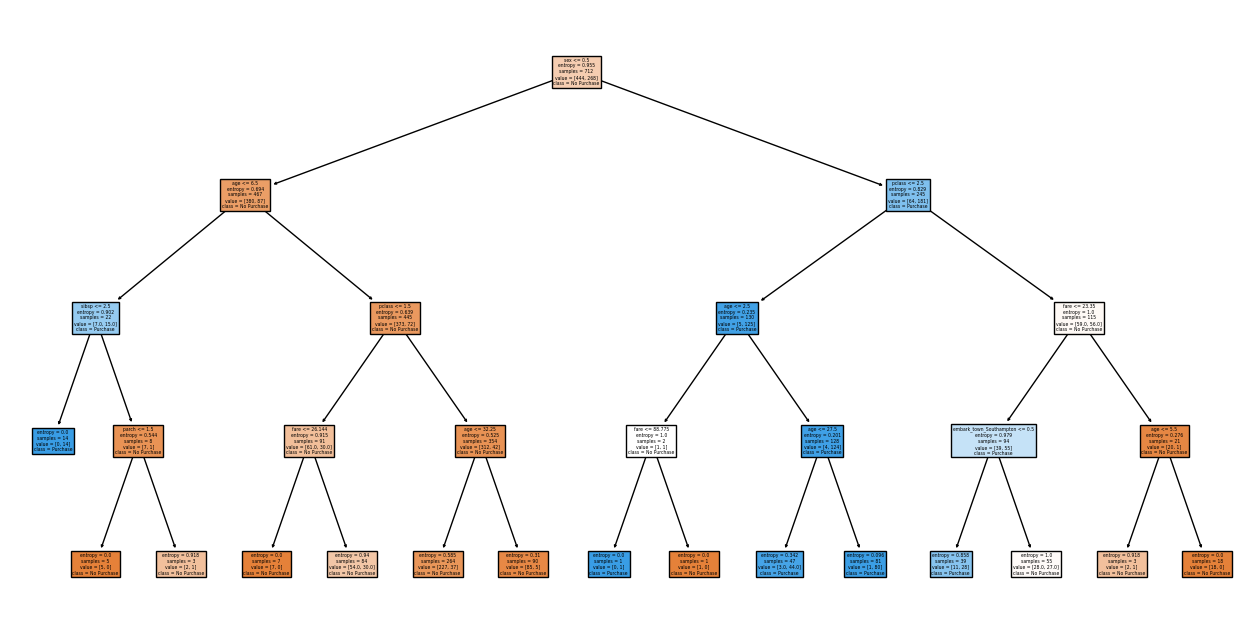

In [21]:
# Visualization
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=["No Purchase", "Purchase"], filled=True)
plt.show()